
<p align="center">
<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width=300 />
</p>


# Final Project: Breast Cancer Diagnosis Predictor

### Introduction

This project focuses on building a logistic regression model (implemented as a small neural network) to predict whether a tumor is malignant or benign based on characteristics computed from digital images of fine needle aspirate (FNA) of breast masses. This is a classic binary classification problem providing an excellent opportunity to apply machine learning techniques.

We will use the **Breast Cancer Wisconsin (Diagnostic) Dataset** available directly from the Scikit-learn library.

### Step 1: Data Loading and Preprocessing

#### Task 1: Load the Breast Cancer dataset and preprocess it for training.

Loading and preprocessing the dataset involves reading the data, splitting it into training and testing sets, and standardizing the features. You will utilize `sklearn.datasets` to load the data, `pandas` for optional data manipulation/inspection, `train_test_split` from `sklearn` for data splitting, and `StandardScaler` for feature scaling.

Note: Please ensure all the required libraries are installed and imported.

1. Load the dataset:
Use `load_breast_cancer()` from `sklearn.datasets` to load the dataset.</br>
2. Split data into features and target: The loaded dataset object contains `.data` for features (X) and `.target` for the target variable (y).</br>
3. Split the Data into Training and Testing Sets:
Use `train_test_split()` from `sklearn.model_selection` to divide the data. Set `test_size`=0.2 to allocate 20% for testing and 80% for training, and use `random_state`=42 to ensure reproducibility of the split.</br>
4. Standardize the features:
Use `StandardScaler()` from sklearn.preprocessing to scale the features.</br>
5. Convert to PyTorch tensors:
Use `torch.tensor()` to convert the data to PyTorch tensors.

#### Exercise 1:
Write a code to load the dataset, split it into training and testing sets, standardize the features, and convert the data into PyTorch tensors for use in training a PyTorch model.



### Setup
Installing required libraries:

The following required libraries are not pre-installed in the Skills Network Labs environment. You will need to run the following cell to install them:


In [150]:
!pip install pandas scikit-learn torch matplotlib seaborn optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 3.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 579.1/579.1 kB 3.4 MB/s eta 0:00:00


## Load dataset

In [152]:
## Write your code here
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import optuna



# Load dataset

In [8]:
breast_cancer_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"

column_names = [
    'ID', 'diagnosis',
    'mean radius', 'mean texture', 'mean perimeter', 'mean area',
    'mean smoothness', 'mean compactness', 'mean concavity',
    'mean concave points', 'mean symmetry', 'mean fractal dimension',
    'se radius', 'se texture', 'se perimeter', 'se area', 'se smoothness',
    'se compactness', 'se concavity', 'se concave points', 'se symmetry',
    'se fractal dimension',
    'worst radius', 'worst texture', 'worst perimeter', 'worst area',
    'worst smoothness', 'worst compactness', 'worst concavity',
    'worst concave points', 'worst symmetry', 'worst fractal dimension'
]

cancer_data = pd.read_csv(breast_cancer_url, header=None, names=column_names)

# The id column isn't relevant
cancer_data = cancer_data.drop('ID', axis=1)

## Perform basic exploratory data analysis (EDA)

In [9]:
cancer_data.isnull().sum()

diagnosis                  0
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
se radius                  0
se texture                 0
se perimeter               0
se area                    0
se smoothness              0
se compactness             0
se concavity               0
se concave points          0
se symmetry                0
se fractal dimension       0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [10]:
cancer_data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [11]:
cancer_data.count()

diagnosis                  569
mean radius                569
mean texture               569
mean perimeter             569
mean area                  569
mean smoothness            569
mean compactness           569
mean concavity             569
mean concave points        569
mean symmetry              569
mean fractal dimension     569
se radius                  569
se texture                 569
se perimeter               569
se area                    569
se smoothness              569
se compactness             569
se concavity               569
se concave points          569
se symmetry                569
se fractal dimension       569
worst radius               569
worst texture              569
worst perimeter            569
worst area                 569
worst smoothness           569
worst compactness          569
worst concavity            569
worst concave points       569
worst symmetry             569
worst fractal dimension    569
dtype: int64

In [12]:
cancer_data["diagnosis"].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [13]:
cancer_data["diagnosis"] = cancer_data["diagnosis"].map({"M": 1, "B": 0})

In [14]:
cancer_data.head()

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Search for correlations

In [15]:
corr_matrix = cancer_data.corr()
corr_matrix

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
mean radius,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
mean texture,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
mean perimeter,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
mean area,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
mean smoothness,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
mean compactness,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
mean concavity,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
mean concave points,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
mean symmetry,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


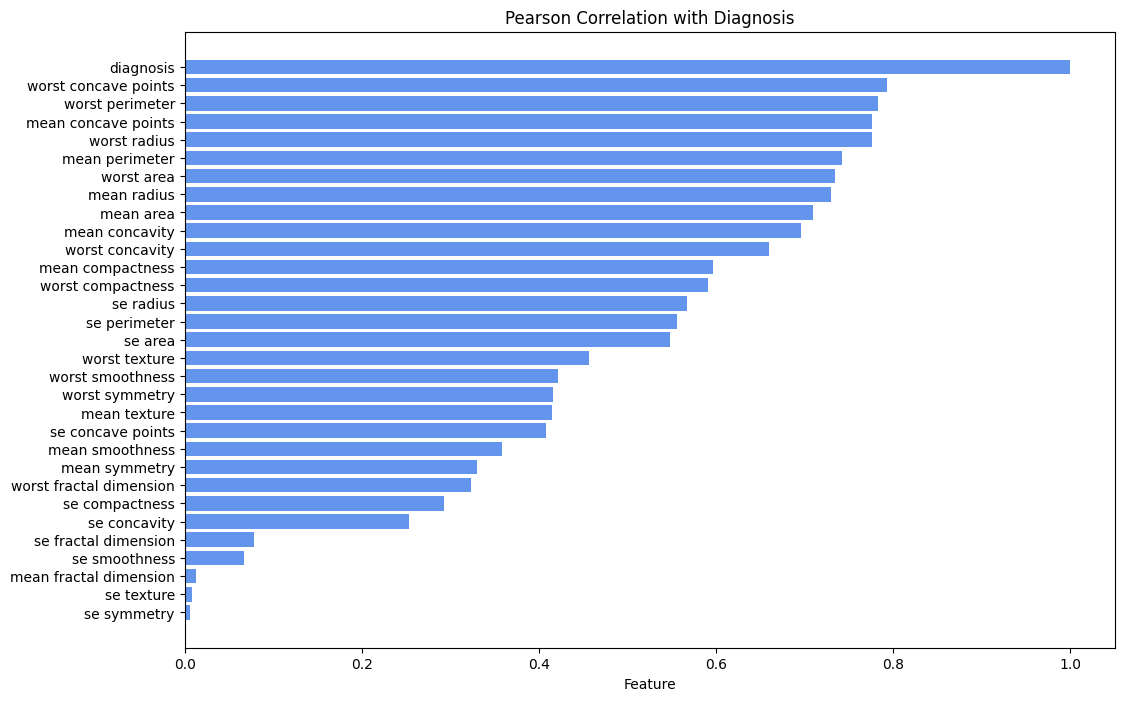

In [ ]:
# Most correlated column with our target
correlated = corr_matrix["diagnosis"].abs().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
plt.barh(correlated.index, correlated.values, color='cornflowerblue')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature on top
plt.title("Pearson Correlation with Diagnosis")
plt.xlabel("Feature")
plt.show();

## Prepare data for training

In [76]:
def get_device():
    device = "cuda" if torch.cuda.is_available() else "cpu"
    return torch.device(device)

device = get_device()
device

device(type='cuda')

## Note

In addition to the training and validation datasets, we will create a test dataset to avoid data leakage.

In [107]:
X = cancer_data.drop('diagnosis', axis=1)
y = cancer_data['diagnosis']

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, stratify=y, random_state=42
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, stratify=y_temp, random_state=42
)

# Standardize feature sets
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Convert our sets to tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_val = torch.tensor(X_val, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)

# Series.values
y_train = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)
y_val = torch.tensor(y_val.values, dtype=torch.float32).unsqueeze(1)
y_test = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)

# Move tensors to CUDA
X_train, y_train = X_train.to(device), y_train.to(device)
X_val, y_train = X_val.to(device), y_train.to(device) 
X_test, y_test = X_test.to(device), y_test.to(device)

# Create datasets and dataloaders
train_dataset = TensorDataset(X_train, y_train)
val_dataset = TensorDataset(X_val, y_val)
test_dataset = TensorDataset(X_test, y_test)

BATCH_SIZE = 64
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

### Step 2: Logistic Regression Model

#### Task 2: Implement a logistic regression model using PyTorch.

Defining the logistic regression model involves specifying the input dimensions, the forward pass using the sigmoid activation function, and initializing the model, loss function, and optimizer.

1 .Define the Logistic Regression Model:</br>
  Create a class LogisticRegressionModel that inherits from torch.nn.Module.</br>
 - In the `__init__()` method, define a linear layer (nn.Linear) to implement the logistic regression model.</br>
- The `forward()` method should apply the sigmoid activation function to the output of the linear layer.</br>

2.Initialize the Model, Loss Function, and Optimizer:</br>
- Set input_dim: Use `X_train.shape[1]` to get the number of features from the training data (X_train).</br>
- Initialize the model: Create an instance of the LogisticRegressionModel class  (e.g., `model = LogisticRegressionModel()`)while passing input_dim as a parameter</br>
- Loss Function: Use `BCELoss()` from torch.nn (Binary Cross-Entropy Loss).</br>
- Optimizer: Initialize the optimizer using `optim.SGD()` with a learning rate of 0.01</br>

#### Exercise 2:

Define the logistic regression model using PyTorch, specifying the input dimensions and the forward pass. Initialize the model, loss function, and optimizer.


In [108]:
## Write your code here
class LogisticRegression(nn.Module):
    def __init__(self, input_dim, hidden_dim, dropout_prob=0.3):
        super(LogisticRegression, self).__init__()
        self.layers = nn.ModuleList()

        dims = self._decrescente_dims(hidden_dim)
        prev_dim = input_dim
        for dim in dims:
            self.layers.append(nn.Linear(prev_dim, dim))
            self.layers.append(nn.BatchNorm1d(dim))
            self.layers.append(nn.ReLU())
            self.layers.append(nn.Dropout(dropout_prob))
            prev_dim = dim
        
        self.output_layer = nn.Linear(prev_dim, 1)
        self.activation = nn.Sigmoid()

        # Initialize weights using He Normal
        self._initialize_weights()

    def _decrescente_dims(self, hidden_dim):
        # 128 -> [128, 64, 32]
        dims = []
        dim = hidden_dim
        while dim > 16: 
            dims.append(dim)
            dim = dim // 2
        return dims

    def _initialize_weights(self):
        for module in self.modules():
            if isinstance(module, nn.Linear):
                # Kaiming Normal
                nn.init.kaiming_normal_(module.weight, nonlinearity='relu')
                
                # Initialize the bias as zeros
                if module.bias is not None:
                    nn.init.zeros_(module.bias)

    def forward(self, x):
        for layer in self.layers:
            x = layer(x)
            
        x = self.output_layer(x)
        x = self.activation(x)
        return x
    

### Step 3: Model Training

#### Task 3: Train the logistic regression model on the dataset.

The training loop will run for a specified number of epochs. In each epoch, the model makes predictions, calculates the loss, performs backpropagation, and updates the model parameters.

1. Set Number of Epochs:  
   - Define the number of epochs for training to 1000.

2. Training Loop:  
   For each epoch:
   - Set the model to training mode using `model.train()`.
   - Zero the gradients using `optimizer.zero_grad()`.
   - Pass the training data (`X_train`) through the model to get the predictions (`outputs`).
   - Calculate the loss using the defined loss function (`criterion`).
   - Perform backpropagation with `loss.backward()`.
   - Update the model's weights using `optimizer.step()`.

3. Print Loss Every 100 Epochs:  
   - After every 100 epochs, print the current epoch number and the loss value.

4. Model Evaluation:  
   - Set the model to evaluation mode using `model.eval()`.
   - Use `torch.no_grad()` to ensure no gradients are calculated during evaluation.
   - Get predictions on both the training set (`X_train`) and the test set (`X_test`).

5. Calculate Accuracy:  
   - For both the training and test datasets, compute the accuracy by comparing the predicted values with the true values (`y_train`, `y_test`).
   - Use a threshold of 0.5 for classification
   
6. Print Accuracy:  
   - Print the training and test accuracies after the evaluation is complete.

#### Exercise 3:

Write the code to train the logistic regression model on the dataset. Implement the training loop, making predictions, calculating the loss, performing backpropagation, and updating model parameters. Evaluate the model's accuracy on training and testing sets.


## Note

The training loop is a large chunk of code, so let's break it down into smaller functions.

In [109]:
def train_one_epoch(model, dataloader, criterion, optimizer, device, clip_grad=None):
    model.train()
    total_loss = 0
    correct = 0
    total = 0

    for X_batch, y_batch in dataloader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()

        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()

        if clip_grad:
            nn.utils.clip_grad_norm_(model.parameters(), max_norm=clip_grad)

        optimizer.step()

        total_loss += loss.item() * X_batch.size(0)
        preds = (outputs > 0.5).float()
        correct += (preds == y_batch).sum().item()
        total += y_batch.size(0)

    avg_loss = total_loss / total
    accuracy = correct / total
    return avg_loss, accuracy


def evaluate(model, dataloader, criterion, device, threshold=0.5):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0.0

    # Ensure no gradient calculations
    with torch.no_grad():
        for X_batch, y_batch in dataloader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            running_loss += loss.item()

            preds = (outputs >= threshold).float()
            correct += (preds == y_batch).sum().item()
            total += y_batch.size(0)

    val_loss = running_loss / len(dataloader)
    val_acc = correct / total

    return val_loss, val_acc

## Training additions
The model training will feature a Learning Rate Scheduler and Early Stoping to save computational resources.

In [161]:
def train_binary_classifier(train_loader, val_loader, config, callback=None):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # Initialize model, optimizer, scheduler, and loss criterion
    model_class = config["model_class"]
    model = model_class(config["input_dim"], config["hidden_dim"]).to(device)

    optimizer = optim.Adam(
        model.parameters(),
        lr=config["lr"],
        weight_decay=config["weight_decay"]
    )
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(
        optimizer, mode='min', factor=0.5, patience=10
    )
    criterion = nn.BCELoss()

    # Tracking metrics
    train_losses, train_accuracies = [], []
    val_losses, val_accuracies = [], []

    best_val_loss = float('inf')
    delta = 1e-4
    patience_counter = 0
    patience = 20  # Early stopping patience

    for epoch in range(config["epochs"]):
        # Training step
        train_loss, train_acc = train_one_epoch(
            model, train_loader, criterion, optimizer, device, clip_grad=1.0
        )

        # Validation step
        val_loss, val_acc = evaluate(model, val_loader, criterion, device)

        # Record metrics
        train_losses.append(train_loss)
        train_accuracies.append(train_acc)
        val_losses.append(val_loss)
        val_accuracies.append(val_acc)

        # Adjust learning rate based on validation loss
        scheduler.step(val_loss)

        # Early stopping check
        if val_loss < best_val_loss - delta:
            best_val_loss = val_loss
            patience_counter = 0
        else:
            patience_counter += 1
            if patience_counter >= patience:
                print(f"Early stopping at epoch {epoch + 1}")
                print(
                    f'Epoch [{epoch + 1}/{config["epochs"]}] - '
                    f'Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, '
                    f'Train Acc: {train_acc:.4f}, Val Acc: {val_acc:.4f}, '
                    f'LR: {optimizer.param_groups[0]["lr"]:.6f}'
                )
                break

        # Periodic feedback
        if (epoch + 1) % 100 == 0 or epoch == config["epochs"] - 1:
            print(
                f'Epoch [{epoch + 1}/{config["epochs"]}] - '
                f'Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, '
                f'Train Acc: {train_acc:.4f}, Val Acc: {val_acc:.4f}, '
                f'LR: {optimizer.param_groups[0]["lr"]:.6f}'
            )

        # Optional callback for hyperparameter tuning frameworks
        if callback:
            callback(train_loss, train_acc, val_acc, val_loss)

    return {
        "model": model,
        "train_losses": train_losses,
        "val_losses": val_losses,
        "train_accuracies": train_accuracies,
        "val_accuracies": val_accuracies
    }

In [111]:
# Generate a reusable function fo plotting history
def plot_model_training(history):
    plt.figure(figsize=(16, 6))

    # Accuracy history
    plt.subplot(1, 2, 1)
    plt.plot(history["train_accuracies"])
    plt.plot(history["val_accuracies"])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Loss history
    plt.subplot(1, 2, 2)
    plt.plot(history["train_losses"])
    plt.plot(history["val_losses"])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper right')

    plt.tight_layout()
    plt.show()

In [ ]:
config = {
        "lr": 1e-2,
        "weight_decay": 0,
        "epochs": 1000,
        "model_class": LogisticRegression,
        "input_dim": X_train.shape[1],
        "hidden_dim": 64,
}

history = train_binary_classifier(train_loader, val_loader, config)

Early stopping at epoch 31
Epoch [31/1000] - Train Loss: 0.0607, Val Loss: 0.2754, Train Acc: 0.9849, Val Acc: 0.9647, LR: 0.005000


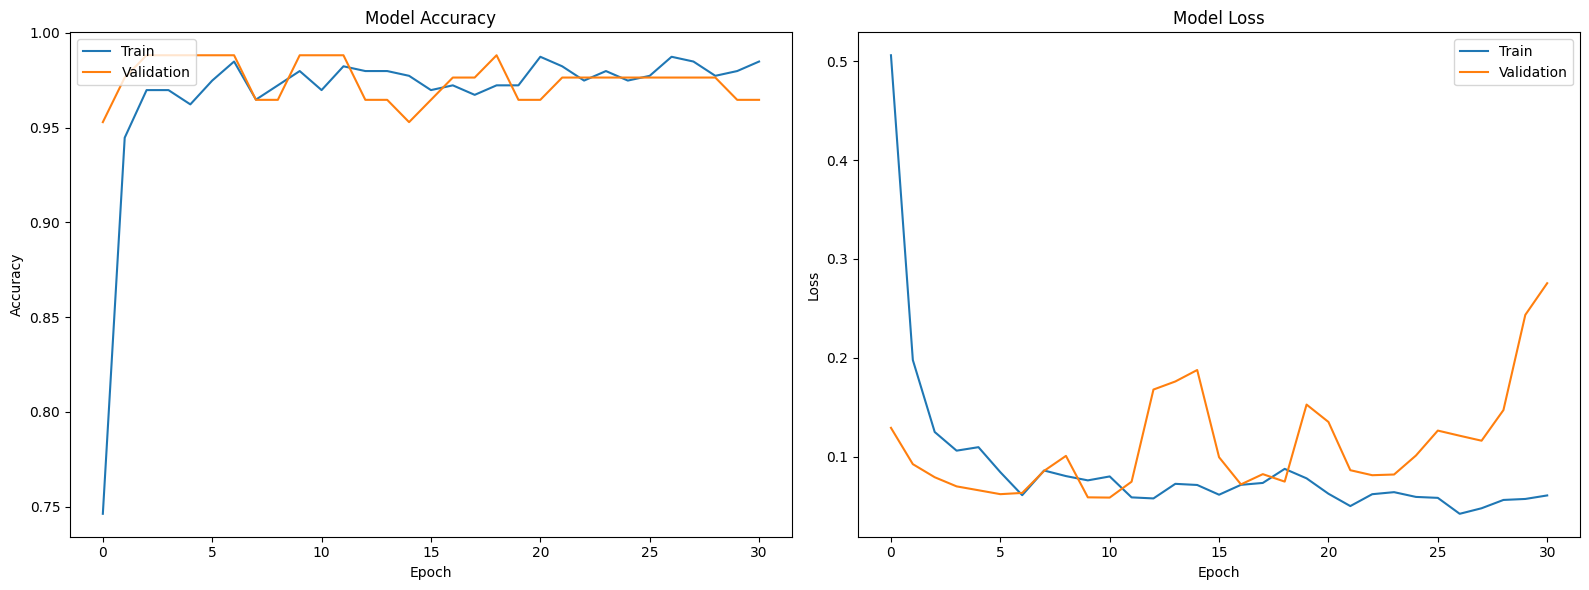

In [113]:
plot_model_training(history)

### Step 4: Model Optimization and Evaluation

#### Task 4: Implement optimization techniques and evaluate the model's performance.

Optimization techniques such as L2 regularization (Ridge Regression) help in preventing overfitting. The model is retrained with these optimizations, and its performance is evaluated on both training and testing sets.

**Weight Decay** :In the context of machine learning and specifically in optimization algorithms, weight_decay is a parameter used to apply L2 regularization to the model's parameters (weights). It helps prevent the model from overfitting by penalizing large weight values, thereby encouraging the model to find simpler solutions.To use L2 regularization, you need to modify the optimizer by setting the weight_decay parameter. The weight_decay parameter in the optimizer adds the L2 regularization term during training.
For example, when you initialize the optimizer with optim.SGD(model.parameters(), lr=0.01, weight_decay=0.01), the weight_decay=0.01 term applies L2 regularization with a strength of 0.01.

1. Set Up the Optimizer with L2 Regularization:
   - Modify the optimizer to include `weight_decay` for L2 regularization.
   - Example:
     ```python
     optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=0.0001)
     ```
2. Train the Model with L2 Regularization:
    - Follow the same steps as before but use the updated optimizer with regularization during training.
    - Use epochs=1000
   
3. Evaluate the Optimized Model:
   - After training, evaluate the model on both the training and test datasets.
   - Compute the accuracy for both sets by comparing the model's predictions to the true labels (`y_train` and `y_test`).

4. Calculate and Print the Accuracy:
   - Use a threshold of 0.5 to determine whether the model's predictions are class 0 or class 1.
   - Print the training accuracy and test accuracy  after evaluation.


#### Exercise 4:

Implement optimization techniques like L2 regularization and retrain the model. Evaluate the performance of the optimized model on both training and testing sets.


In [ ]:
## Write your code here
config = {
        "lr": 1e-3,
        "weight_decay": 1e-4,
        "epochs": 1000,
        "model_class": LogisticRegression,
        "input_dim": X_train.shape[1],
        "hidden_dim": 64,
}

history = train_binary_classifier(train_loader, val_loader, config)

Early stopping at epoch 52
Epoch [52/1000] - Train Loss: 0.0958, Val Loss: 0.0853, Train Acc: 0.9623, Val Acc: 0.9765, LR: 0.000500


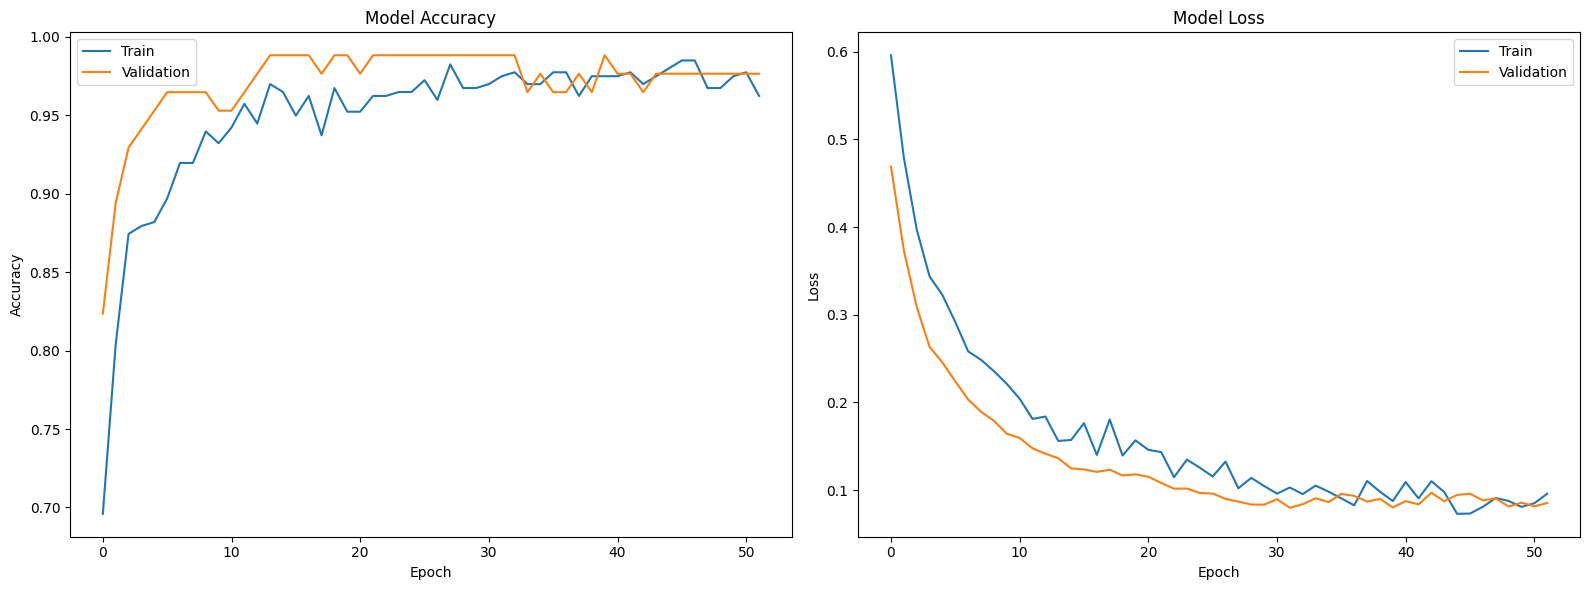

In [115]:
plot_model_training(history)

## Notes

With L2 regularization the model didn't overfit and the test accuracy was slightly improved on the same dataset.

### Step 5: Visualization and Interpretation

Visualization tools like confusion matrices and ROC curves provide insights into the model's performance. The confusion matrix helps in understanding the classification accuracy, while the ROC curve illustrates the trade-off between sensitivity and specificity.

Confusion Matrix : A Confusion Matrix is a fundamental tool used in classification problems to evaluate the performance of a model. It provides a matrix showing the number of correct and incorrect predictions made by the model, categorized by the actual and predicted classes.
Where
-  True Positive (TP): Correctly predicted positive class (class 1).
- True Negative (TN): Correctly predicted negative class (class 0).
- False Positive (FP): Incorrectly predicted as positive (class 1), but the actual class is negative (class 0). This is also called a Type I error.
- False Negative (FN): Incorrectly predicted as negative (class 0), but the actual class is positive (class 1). This is also called a Type II error.

ROC Curve (Receiver Operating Characteristic Curve):
The ROC Curve is a graphical representation used to evaluate the performance of a binary classification model across all classification thresholds. It plots two metrics:
- True Positive Rate (TPR) or Recall (Sensitivity)-It is the proportion of actual positive instances (class 1) that were correctly classified as positive by the model.
- False Positive Rate (FPR)-It is the proportion of actual negative instances (class 0) that were incorrectly classified as positive by the model.
  
AUC:
AUC stands for Area Under the Curve and is a performance metric used to evaluate the quality of a binary classification model. Specifically, it refers to the area under the ROC curve (Receiver Operating Characteristic curve), which plots the True Positive Rate (TPR) versus the False Positive Rate (FPR) for different threshold values.

Classification Report:
A Classification Report is a summary of various classification metrics, which are useful for evaluating the performance of a classifier on the given dataset.

#### Exercise 5:

Write code to visualize the model's performance using confusion matrices and ROC curves. Generate classification reports to evaluate precision, recall, and F1-score. Retrain the model with L2 regularization and evaluate the performance.


In [ ]:
## Write your code here

# This is a function which I always use in my personal toolkit
def plot_conf_matrix_report(y_pred, y_true, y_score):
    # Converte tensores para NumPy arrays
    y_pred = y_pred.cpu().numpy().flatten()
    y_true = y_true.cpu().numpy().flatten()
    y_score = y_score.cpu().numpy().flatten()

    plt.figure(figsize=(18, 5)) 

    # Subplot 1 - Classification Report
    plt.subplot(1, 3, 1)
    plt.title('Classification Report')
    clf_report = classification_report(y_true, y_pred, output_dict=True)
    report_df = pd.DataFrame(clf_report).iloc[:-1, :].T
    sns.heatmap(report_df, annot=True, cmap='coolwarm', fmt=".2f")

    # Subplot 2 - Confusion Matrix
    plt.subplot(1, 3, 2)
    plt.title('Confusion Matrix')
    conf_matrix = confusion_matrix(y_true, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=np.unique(y_true), yticklabels=np.unique(y_true))

    # Subplot 3 - ROC Curve
    fpr, tpr, _ = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)
    plt.subplot(1, 3, 3)
    plt.title(f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")

    plt.tight_layout()
    plt.show()


def evaluate_model(model, test_loader, threshold=0.5):
    model.eval()
    y_preds = []
    y_scores = []
    y_trues = []

    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            score = model(X_batch)
            pred = (score >= threshold).float()

            y_scores.append(score)
            y_preds.append(pred)
            y_trues.append(y_batch)

    # Concat everything in one tensor
    y_score = torch.cat(y_scores).squeeze()
    y_pred = torch.cat(y_preds).squeeze()
    y_true = torch.cat(y_trues).squeeze()

    return {
        "y_score": y_score,
        "y_pred": y_pred,
        "y_true": y_true,
    }


## Evaluation

Time to evaluate the model and plot it's predictions on the test data.

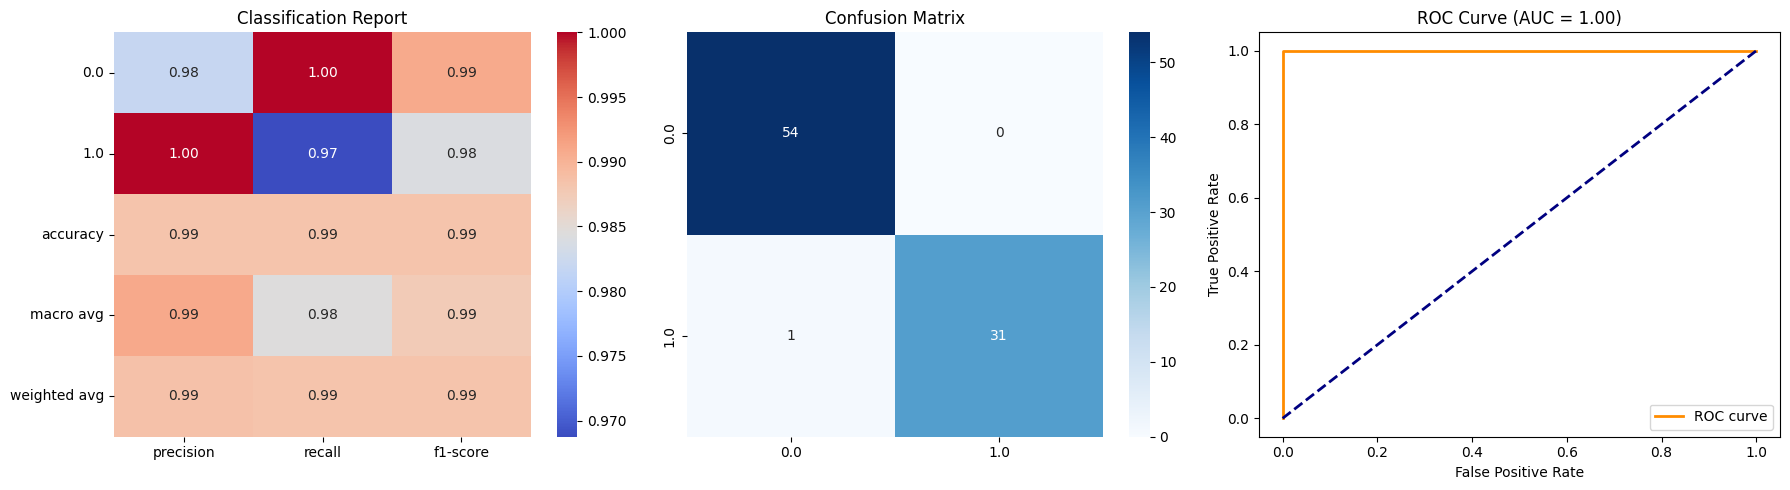

In [119]:
results = evaluate_model(history["model"], test_loader)

plot_conf_matrix_report(
    results["y_pred"],
    results["y_true"],
    results["y_score"]
)

Impressive!
The model just missclassified a single sample. Almost perfect

### Step 6: Model Saving and Loading

#### Task 6: Save and load the trained model.

This task demonstrates the techniques to persist a trained model using `torch.save` and reload it using `torch.load`. Evaluating the loaded model ensures that it retains its performance, making it practical for deployment in real-world applications.

1. Saving the Model:
- Save the model's learned weights and biases using torch.save().( e.g. , torch.save(model.state_dict(), 'your_model_name.pth'))
- Saving only the state dictionary (model parameters) is preferred because it’s more flexible and efficient than saving the entire model object.

2. Loading the Model:
- Create a new model instance (e.g., `model = LogisticRegressionModel()`) and load the saved parameters. ( e.g. , `model.load_state_dict(torch.load('your_model_name.pth'))`)`.

3. Evaluating the Loaded Model:
   - After loading, set the model to evaluation mode by calling `model.eval()
   - After loading the model, evaluate it again on the test dataset to make sure it performs similarly to when it was first trained..Now evaluate it on the test data.
   - Use `torch.no_grad()` to ensure that no gradients are computed.

#### Exercise 6:

Write code to save the trained model and reload it. Ensure the loaded model performs consistently by evaluating it on the test dataset.


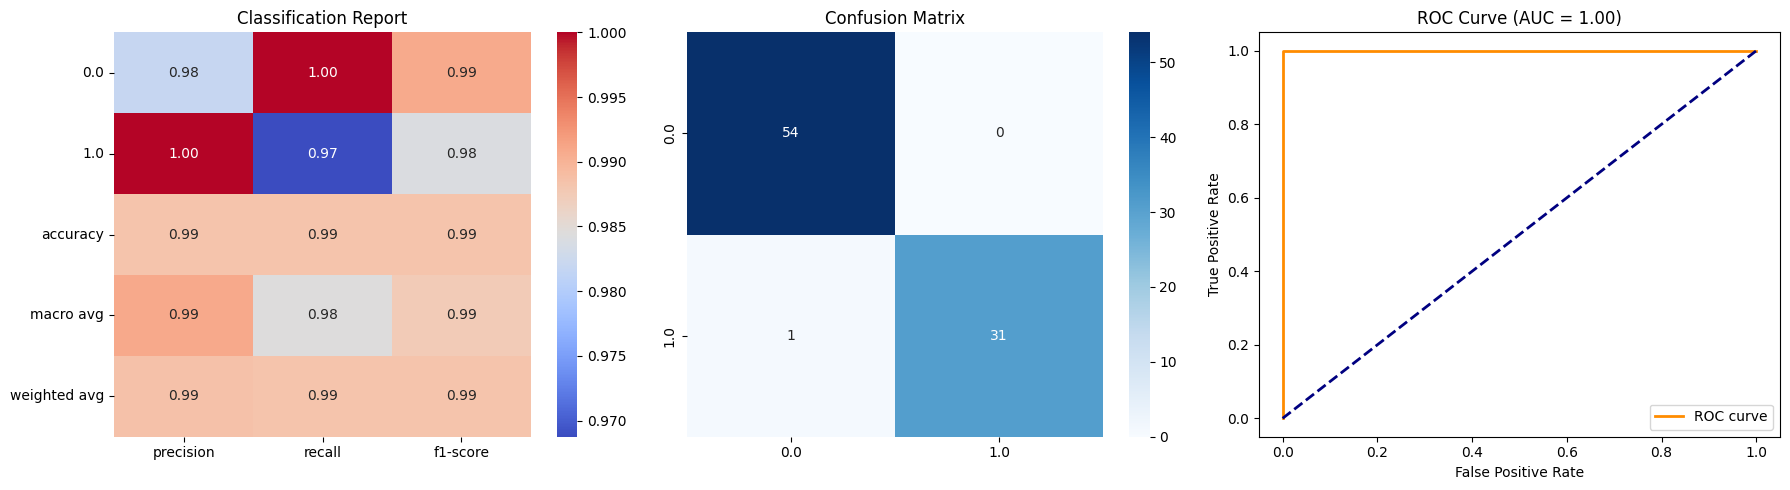

In [146]:
## Write your code here
# Save the model
torch.save(history["model"].state_dict(), "my_model.pth")

# Load state_dict explicitly to CPU to avoid device mismatch
state_dict = torch.load("my_model.pth", map_location='cpu')

model = LogisticRegression(X_train.shape[1], config["hidden_dim"])
model.load_state_dict(state_dict)
model.to(device)

# Evaluate the loaded model (inside function)
results = evaluate_model(model, test_loader)

plot_conf_matrix_report(
    results["y_pred"],
    results["y_true"],
    results["y_score"]
)

### Step 7: Hyperparameter Tuning

#### Task 7: Perform hyperparameter tuning to find the best learning rate.

By testing different learning rates, you will identify the optimal rate that provides the best test accuracy. This fine-tuning is crucial for enhancing model performance .
1. Define Learning Rates:
   - Choose these learning rates to test ,[0.01, 0.05, 0.1]

2. Reinitialize the Model for Each Learning Rate:
  - For each learning rate, you’ll need to reinitialize the model and optimizer e.g.(`torch.optim.SGD(model.parameters(), lr=lr)`).
   - Each new learning rate requires reinitializing the model since the optimizer and its parameters are linked to the learning rate.

3. Train the Model for Each Learning Rate:
  - Train the model for a fixed number of epochs (e.g., 50 or 100 epochs) for each learning rate, and compute the accuracy on the test set.
  - Track the test accuracy for each learning rate and identify which one yields the best performance.

4. Evaluate and Compare:
  - After training with each learning rate, compare the test accuracy for each configuration.
   - Report the learning rate that gives the highest test accuracy

#### Exercise 7:

Perform hyperparameter tuning to find the best learning rate. Retrain the model for each learning rate and evaluate its performance to identify the optimal rate.


## Notes

There is a great tuning library called `optuna` which simplifiest the hyperparameter space searching.

We will also improve our code with good pratices breaking it down in smaller, reusable functions.

### How to install
```bash
pip install optuna
```

In [174]:
import optuna

def objective(trial):
    lr = trial.suggest_loguniform('lr', 1e-5, 1e-2)
    weight_decay = trial.suggest_loguniform('weight_decay', 1e-5, 1e-2)
    hidden_dim = trial.suggest_categorical('hidden_dim', [64, 128, 256])

    config = {
        "lr": lr,
        "weight_decay": weight_decay,
        "epochs": 20,
        "model_class": LogisticRegression,
        "input_dim": X_train.shape[1],
        "hidden_dim": hidden_dim
    }

    result = train_binary_classifier(train_loader, val_loader, config)
    val_accuracy = result["val_accuracies"][-1]
    
    return val_accuracy

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30)


[I 2025-05-27 21:34:34,488] A new study created in memory with name: no-name-4cae6b35-6c4e-4998-8d1f-575a2639da40
/tmp/ipykernel_45579/3239025990.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('lr', 1e-5, 1e-2)
/tmp/ipykernel_45579/3239025990.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('weight_decay', 1e-5, 1e-2)
[I 2025-05-27 21:34:35,051] Trial 0 finished with value: 0.9411764705882353 and parameters: {'lr': 0.00017255576658511306, 'weight_decay': 1.736900555373641e-05, 'hidden_dim': 64}. Best is trial 0 with value: 0.9411764705882353.


Epoch [20/20] - Train Loss: 0.4418, Val Loss: 0.3558, Train Acc: 0.7889, Val Acc: 0.9412, LR: 0.000173


[I 2025-05-27 21:34:35,689] Trial 1 finished with value: 0.6705882352941176 and parameters: {'lr': 3.9552242334918825e-05, 'weight_decay': 2.5283365911106375e-05, 'hidden_dim': 128}. Best is trial 0 with value: 0.9411764705882353.


Epoch [20/20] - Train Loss: 0.6806, Val Loss: 0.6006, Train Acc: 0.6281, Val Acc: 0.6706, LR: 0.000040


[I 2025-05-27 21:34:36,335] Trial 2 finished with value: 0.9411764705882353 and parameters: {'lr': 0.0005407439862366097, 'weight_decay': 0.003970657052294375, 'hidden_dim': 128}. Best is trial 0 with value: 0.9411764705882353.


Epoch [20/20] - Train Loss: 0.2000, Val Loss: 0.1642, Train Acc: 0.9422, Val Acc: 0.9412, LR: 0.000541


[I 2025-05-27 21:34:37,039] Trial 3 finished with value: 0.9882352941176471 and parameters: {'lr': 0.0001713306827357347, 'weight_decay': 0.0073334472343967345, 'hidden_dim': 256}. Best is trial 3 with value: 0.9882352941176471.


Epoch [20/20] - Train Loss: 0.3612, Val Loss: 0.2881, Train Acc: 0.8719, Val Acc: 0.9882, LR: 0.000171


[I 2025-05-27 21:34:37,577] Trial 4 finished with value: 0.7764705882352941 and parameters: {'lr': 9.534927283060454e-05, 'weight_decay': 5.242010795676162e-05, 'hidden_dim': 64}. Best is trial 3 with value: 0.9882352941176471.


Epoch [20/20] - Train Loss: 0.6013, Val Loss: 0.5073, Train Acc: 0.6683, Val Acc: 0.7765, LR: 0.000095


[I 2025-05-27 21:34:38,113] Trial 5 finished with value: 0.9647058823529412 and parameters: {'lr': 0.002396730194128585, 'weight_decay': 0.007026899628966979, 'hidden_dim': 64}. Best is trial 3 with value: 0.9882352941176471.


Epoch [20/20] - Train Loss: 0.1041, Val Loss: 0.1245, Train Acc: 0.9698, Val Acc: 0.9647, LR: 0.002397


[I 2025-05-27 21:34:38,746] Trial 6 finished with value: 0.49411764705882355 and parameters: {'lr': 1.4098449709443398e-05, 'weight_decay': 4.431004430268295e-05, 'hidden_dim': 128}. Best is trial 3 with value: 0.9882352941176471.


Epoch [20/20] - Train Loss: 0.7826, Val Loss: 0.6912, Train Acc: 0.4523, Val Acc: 0.4941, LR: 0.000014


[I 2025-05-27 21:34:39,388] Trial 7 finished with value: 0.9647058823529412 and parameters: {'lr': 0.007978036251301517, 'weight_decay': 1.0389466830852478e-05, 'hidden_dim': 128}. Best is trial 3 with value: 0.9882352941176471.


Epoch [20/20] - Train Loss: 0.0586, Val Loss: 0.1699, Train Acc: 0.9824, Val Acc: 0.9647, LR: 0.003989


[I 2025-05-27 21:34:40,012] Trial 8 finished with value: 0.6470588235294118 and parameters: {'lr': 1.1298746468142218e-05, 'weight_decay': 0.0015145911001908563, 'hidden_dim': 128}. Best is trial 3 with value: 0.9882352941176471.


Epoch [20/20] - Train Loss: 0.7588, Val Loss: 0.7429, Train Acc: 0.6533, Val Acc: 0.6471, LR: 0.000011


[I 2025-05-27 21:34:40,608] Trial 9 finished with value: 0.7411764705882353 and parameters: {'lr': 7.916048554233494e-05, 'weight_decay': 2.353200247849191e-05, 'hidden_dim': 128}. Best is trial 3 with value: 0.9882352941176471.


Epoch [20/20] - Train Loss: 0.5927, Val Loss: 0.5417, Train Acc: 0.6834, Val Acc: 0.7412, LR: 0.000079


[I 2025-05-27 21:34:41,289] Trial 10 finished with value: 0.9647058823529412 and parameters: {'lr': 0.0006270348029167744, 'weight_decay': 0.0003852244291700617, 'hidden_dim': 256}. Best is trial 3 with value: 0.9882352941176471.


Epoch [20/20] - Train Loss: 0.1736, Val Loss: 0.1354, Train Acc: 0.9548, Val Acc: 0.9647, LR: 0.000627


[I 2025-05-27 21:34:42,010] Trial 11 finished with value: 0.9647058823529412 and parameters: {'lr': 0.002295584408117117, 'weight_decay': 0.008380545377703398, 'hidden_dim': 256}. Best is trial 3 with value: 0.9882352941176471.


Epoch [20/20] - Train Loss: 0.0848, Val Loss: 0.1709, Train Acc: 0.9824, Val Acc: 0.9647, LR: 0.002296


[I 2025-05-27 21:34:42,727] Trial 12 finished with value: 0.9764705882352941 and parameters: {'lr': 0.0018334640405823174, 'weight_decay': 0.0012658548017130096, 'hidden_dim': 256}. Best is trial 3 with value: 0.9882352941176471.


Epoch [20/20] - Train Loss: 0.0766, Val Loss: 0.0871, Train Acc: 0.9799, Val Acc: 0.9765, LR: 0.001833


[I 2025-05-27 21:34:43,435] Trial 13 finished with value: 0.9647058823529412 and parameters: {'lr': 0.0013986600829739273, 'weight_decay': 0.0012527428747076015, 'hidden_dim': 256}. Best is trial 3 with value: 0.9882352941176471.


Epoch [20/20] - Train Loss: 0.1065, Val Loss: 0.0965, Train Acc: 0.9698, Val Acc: 0.9647, LR: 0.001399


[I 2025-05-27 21:34:44,123] Trial 14 finished with value: 0.9764705882352941 and parameters: {'lr': 0.006647629141552386, 'weight_decay': 0.0013191764700942903, 'hidden_dim': 256}. Best is trial 3 with value: 0.9882352941176471.


Epoch [20/20] - Train Loss: 0.0858, Val Loss: 0.1239, Train Acc: 0.9698, Val Acc: 0.9765, LR: 0.003324


[I 2025-05-27 21:34:44,823] Trial 15 finished with value: 0.9529411764705882 and parameters: {'lr': 0.00029099252316609444, 'weight_decay': 0.0003098704616676063, 'hidden_dim': 256}. Best is trial 3 with value: 0.9882352941176471.


Epoch [20/20] - Train Loss: 0.3397, Val Loss: 0.3090, Train Acc: 0.9422, Val Acc: 0.9529, LR: 0.000291


[I 2025-05-27 21:34:45,511] Trial 16 finished with value: 0.9764705882352941 and parameters: {'lr': 0.0009193558340793864, 'weight_decay': 0.0029017785047779293, 'hidden_dim': 256}. Best is trial 3 with value: 0.9882352941176471.


Epoch [20/20] - Train Loss: 0.1321, Val Loss: 0.1120, Train Acc: 0.9698, Val Acc: 0.9765, LR: 0.000919


[I 2025-05-27 21:34:46,192] Trial 17 finished with value: 0.9294117647058824 and parameters: {'lr': 0.00021285172754838068, 'weight_decay': 0.00034543366728468614, 'hidden_dim': 256}. Best is trial 3 with value: 0.9882352941176471.


Epoch [20/20] - Train Loss: 0.2890, Val Loss: 0.2102, Train Acc: 0.9271, Val Acc: 0.9294, LR: 0.000213


[I 2025-05-27 21:34:46,877] Trial 18 finished with value: 0.7529411764705882 and parameters: {'lr': 3.6941301759830974e-05, 'weight_decay': 0.0008421236866846619, 'hidden_dim': 256}. Best is trial 3 with value: 0.9882352941176471.


Epoch [20/20] - Train Loss: 0.6459, Val Loss: 0.5276, Train Acc: 0.6633, Val Acc: 0.7529, LR: 0.000037


[I 2025-05-27 21:34:47,573] Trial 19 finished with value: 0.9764705882352941 and parameters: {'lr': 0.003921387865720628, 'weight_decay': 0.00013550492086960997, 'hidden_dim': 256}. Best is trial 3 with value: 0.9882352941176471.


Epoch [20/20] - Train Loss: 0.0662, Val Loss: 0.1018, Train Acc: 0.9824, Val Acc: 0.9765, LR: 0.001961


[I 2025-05-27 21:34:48,270] Trial 20 finished with value: 0.9647058823529412 and parameters: {'lr': 0.0004944838945685467, 'weight_decay': 0.0025147195834197148, 'hidden_dim': 256}. Best is trial 3 with value: 0.9882352941176471.


Epoch [20/20] - Train Loss: 0.2203, Val Loss: 0.1713, Train Acc: 0.9447, Val Acc: 0.9647, LR: 0.000494


[I 2025-05-27 21:34:48,960] Trial 21 finished with value: 0.9882352941176471 and parameters: {'lr': 0.00798280404818106, 'weight_decay': 0.0007174597624403788, 'hidden_dim': 256}. Best is trial 3 with value: 0.9882352941176471.


Epoch [20/20] - Train Loss: 0.0537, Val Loss: 0.0667, Train Acc: 0.9824, Val Acc: 0.9882, LR: 0.003991


[I 2025-05-27 21:34:49,653] Trial 22 finished with value: 0.9647058823529412 and parameters: {'lr': 0.009972228751504992, 'weight_decay': 0.0007296760794978117, 'hidden_dim': 256}. Best is trial 3 with value: 0.9882352941176471.


Epoch [20/20] - Train Loss: 0.0845, Val Loss: 0.1521, Train Acc: 0.9724, Val Acc: 0.9647, LR: 0.009972


[I 2025-05-27 21:34:50,377] Trial 23 finished with value: 0.9764705882352941 and parameters: {'lr': 0.004208158665936006, 'weight_decay': 0.00019046188546443556, 'hidden_dim': 256}. Best is trial 3 with value: 0.9882352941176471.


Epoch [20/20] - Train Loss: 0.0720, Val Loss: 0.1133, Train Acc: 0.9799, Val Acc: 0.9765, LR: 0.004208


[I 2025-05-27 21:34:51,065] Trial 24 finished with value: 0.9882352941176471 and parameters: {'lr': 0.0014211449480977848, 'weight_decay': 0.004305216492807659, 'hidden_dim': 256}. Best is trial 3 with value: 0.9882352941176471.


Epoch [20/20] - Train Loss: 0.0915, Val Loss: 0.0823, Train Acc: 0.9774, Val Acc: 0.9882, LR: 0.001421


[I 2025-05-27 21:34:51,604] Trial 25 finished with value: 0.9647058823529412 and parameters: {'lr': 0.004111337443521181, 'weight_decay': 0.00501635749269522, 'hidden_dim': 64}. Best is trial 3 with value: 0.9882352941176471.


Epoch [20/20] - Train Loss: 0.0625, Val Loss: 0.1368, Train Acc: 0.9849, Val Acc: 0.9647, LR: 0.004111


[I 2025-05-27 21:34:52,289] Trial 26 finished with value: 0.9882352941176471 and parameters: {'lr': 0.0011429786488844095, 'weight_decay': 0.002387075022961742, 'hidden_dim': 256}. Best is trial 3 with value: 0.9882352941176471.


Epoch [20/20] - Train Loss: 0.1014, Val Loss: 0.0905, Train Acc: 0.9774, Val Acc: 0.9882, LR: 0.001143


[I 2025-05-27 21:34:52,977] Trial 27 finished with value: 0.9529411764705882 and parameters: {'lr': 0.00035253906267069504, 'weight_decay': 0.008788205234181803, 'hidden_dim': 256}. Best is trial 3 with value: 0.9882352941176471.


Epoch [20/20] - Train Loss: 0.2699, Val Loss: 0.2410, Train Acc: 0.9397, Val Acc: 0.9529, LR: 0.000353


[I 2025-05-27 21:34:53,694] Trial 28 finished with value: 0.9764705882352941 and parameters: {'lr': 0.0008460905999377781, 'weight_decay': 0.004405589029456632, 'hidden_dim': 256}. Best is trial 3 with value: 0.9882352941176471.


Epoch [20/20] - Train Loss: 0.1415, Val Loss: 0.1357, Train Acc: 0.9698, Val Acc: 0.9765, LR: 0.000846


[I 2025-05-27 21:34:54,235] Trial 29 finished with value: 0.9294117647058824 and parameters: {'lr': 0.00013220101095094526, 'weight_decay': 0.0006810153942376039, 'hidden_dim': 64}. Best is trial 3 with value: 0.9882352941176471.


Epoch [20/20] - Train Loss: 0.4981, Val Loss: 0.4464, Train Acc: 0.7563, Val Acc: 0.9294, LR: 0.000132


## Train model with best params

Time to use the best parameters found by optuna to train the model

In [176]:
print(study.best_params)

{'lr': 0.0001713306827357347, 'weight_decay': 0.0073334472343967345, 'hidden_dim': 256}


Epoch [100/1000] - Train Loss: 0.1377, Val Loss: 0.1152, Train Acc: 0.9673, Val Acc: 0.9647, LR: 0.000171
Early stopping at epoch 155
Epoch [155/1000] - Train Loss: 0.1085, Val Loss: 0.0937, Train Acc: 0.9824, Val Acc: 0.9882, LR: 0.000043


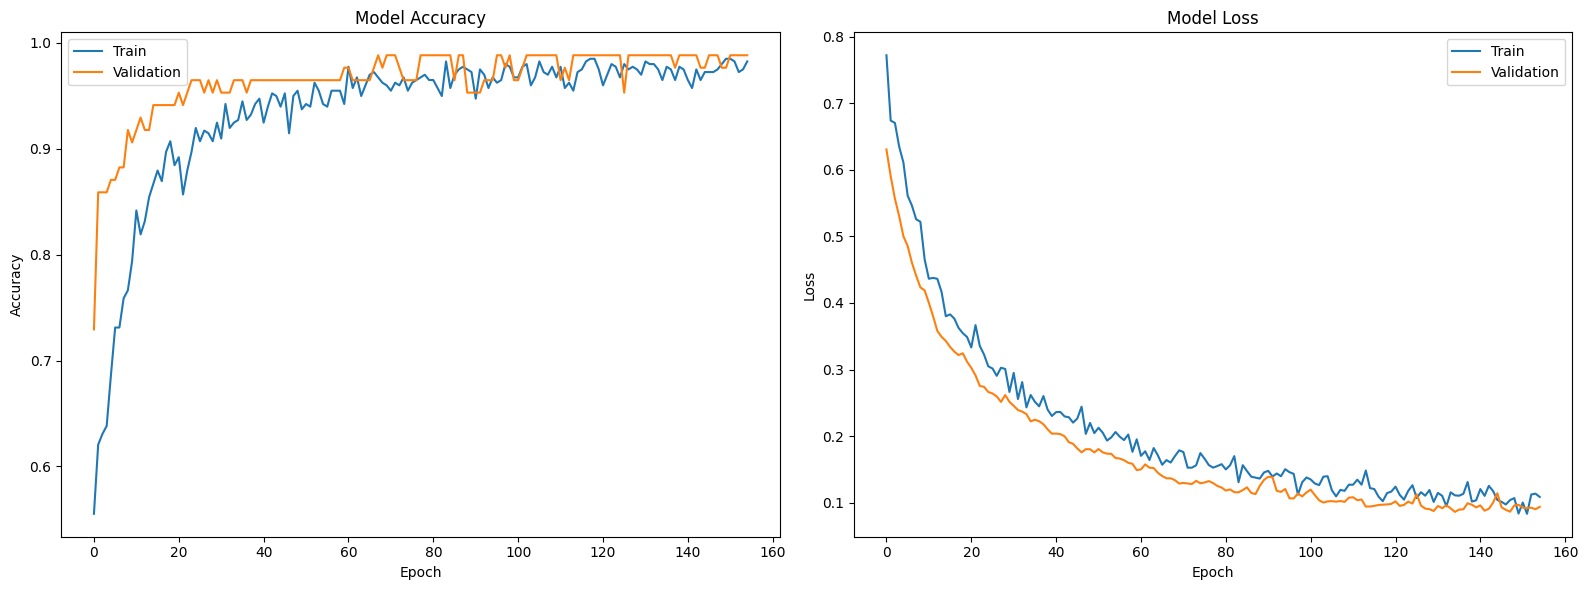

In [175]:
config = {
        "lr": study.best_params["lr"],
        "weight_decay": study.best_params["weight_decay"],
        "epochs": 1000,
        "model_class": LogisticRegression,
        "input_dim": X_train.shape[1],
        "hidden_dim": study.best_params["hidden_dim"],
}

history = train_binary_classifier(train_loader, val_loader, config)

plot_model_training(history)

### Step 8: Feature Importance

#### Task 8: Evaluate feature importance to understand the impact of each feature on the prediction.

The code to evaluate feature importance to understand the impact of each feature on the prediction.

 1.Extracting Model Weights:
  - The weights of the logistic regression model represent the importance of each feature in making predictions. These weights are stored in the model's linear layer (`model.linear.weight`).
 - You can extract the weights using `model.linear.weight.data.numpy()` and flatten the resulting tensor to get a 1D array of feature importances.

2.Creating a DataFrame:
 - Create a pandas DataFrame with two columns: one for the feature names and the other for their corresponding importance values (i.e., the learned weights).
 - Ensure the features are aligned with their names in your dataset (e.g., `X_train.columns).

3. Sorting and Plotting Feature Importance:
  - Sort the features based on the absolute value of their importance (weights) to identify the most impactful features.
  - Use a bar plot (via `matplotlib`) to visualize the sorted feature importances, with the feature names on the y-axis and importance values on the x-axis.

4. Interpreting the Results:
  - Larger absolute weights indicate more influential features. Positive weights suggest a positive correlation with the outcome (likely to predict the positive class), while negative weights suggest the opposite.

#### Exercise 8:

Evaluate feature importance by extracting the weights of the linear layer and creating a DataFrame to display the importance of each feature. Visualize the feature importance using a bar plot.


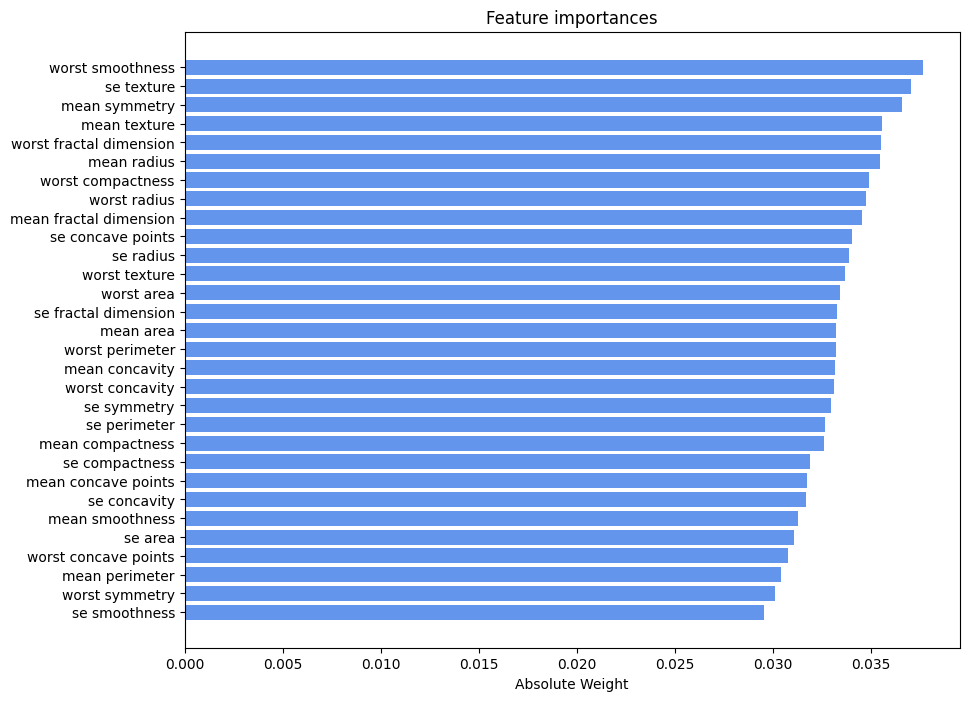

In [ ]:
## Write your code here

import pandas as pd
import matplotlib.pyplot as plt

# Extract the weights of the linear layer
first_linear = history["model"].layers[0]
weights = first_linear.weight.data.cpu().numpy()

# importance = absolute sum of weights of each input layer neuron
importances = np.abs(weights).sum(axis=0) 
importances = importances / importances.sum() 

# A DataFrame for feature importance
importances = pd.DataFrame({ "feature": X.columns, "importance": importances })
importances["importance"] = importances["importance"].abs()
importances = importances.sort_values(by="importance", ascending=False)

plt.figure(figsize=(10, 8))
plt.barh(importances["feature"], importances["importance"], color='cornflowerblue')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature on top
plt.title("Feature importances")
plt.xlabel('Absolute Weight')
plt.show()



#### Conclusion:

Congratulations on completing the project! In this final project, you built a logistic regression model to predict the outcomes of League of Legends matches based on various in-game statistics. This comprehensive project involved several key steps, including data loading and preprocessing, model implementation, training, optimization, evaluation, visualization, model saving and loading, hyperparameter tuning, and feature importance analysis. This project provided hands-on experience with the complete workflow of developing a machine learning model for binary classification tasks using PyTorch.

© Copyright IBM Corporation. All rights reserved.
